# **XGBoost**

In [1]:
# importing libraries
import numpy as np
from sklearn.datasets import fetch_openml #to fetch the MNIST dataset
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
# as_frame will fetch the data as numpy array rather than dataFrame
mnist=fetch_openml("mnist_784",version=1,as_frame=False)

In [3]:
# .astype(int) will change the output from string into integer
x,y=mnist["data"],mnist["target"].astype(int)

In [4]:
# normalizing input
x=x/255.0

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
xgb=XGBClassifier(
    objective="multi:softmax", #This tells XGBoost it’s a multi-class classification problem (digits 0–9).
    max_depth=6, #max depth of the tree
    subsample=0.8, #Uses only 80% of training samples per tree (row wise)
    colsample_bytree=0.8, #Uses only 80% of features (columns) per tree.
    eval_metric="mlogloss", #Metric used for evaluation = multiclass log loss (measures error in probability predictions).
    n_estimators=100, #number of trees
    tree_method="gpu_hist", #Fast training algorithm using histograms (good for large datasets like MNIST).
    num_class=10, #number of classes
    learning_rate=0.1 #learning rate
)

## **Training**

In [7]:
xgb.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:42:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=10, ...)

In [8]:
y_pred=xgb.predict(x_test)

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [09:43:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [09:43:57] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [9]:
print("XGBoost Accuracy:",accuracy_score(y_test,y_pred))

XGBoost Accuracy: 0.9703571428571428


In [11]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.98      1600
           2       0.96      0.97      0.97      1380
           3       0.97      0.95      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



## **Testing**

In [13]:
import cv2
import matplotlib.pyplot as plt

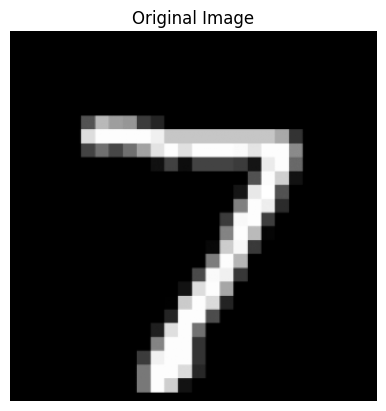

In [39]:
image=cv2.imread("/content/7.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

In [42]:
# Resize to 28x28
resized=cv2.resize(image,(28,28))

# Invert colors if needed (MNIST digits are white on black background)
if np.mean(resized)>127:
  resized=256-resized

# Flatten & normalize
img_flatten=resized.flatten()/255.0


img_flat is a vector of length 784 (28×28).

But XGBoost (like scikit-learn) expects input as a 2D array: (n_samples, n_features).

reshape(1, -1) makes it shape (1, 784) → meaning “1 image, 784 features”.

[0] picks the first (and only) prediction since you gave it one image.

In [43]:
# Make prediction
pred = xgb.predict(img_flatten.reshape(1, -1))[0]

print("Predicted Digit:", pred)


Predicted Digit: 7
